In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
liver_df = pd.read_csv(r'indian_liver_patient - indian_liver_patient.csv')

In [67]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [68]:
liver_df.info()
liver_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [69]:
# Unique values in 'Gender' and 'Dataset' columns
print("Unique values in Gender column:", liver_df['Gender'].unique())
print("Unique values in Dataset column:", liver_df['Dataset'].unique())

# Check for missing values
print("Missing values in each column:")
print(liver_df.isnull().sum())

Unique values in Gender column: ['Female' 'Male']
Unique values in Dataset column: [1 2]
Missing values in each column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


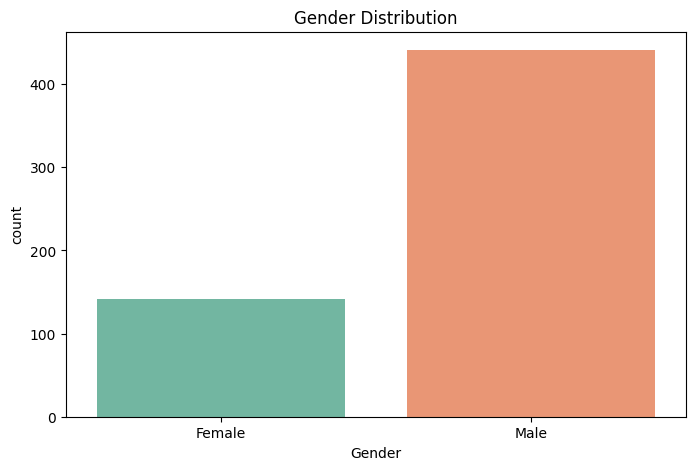

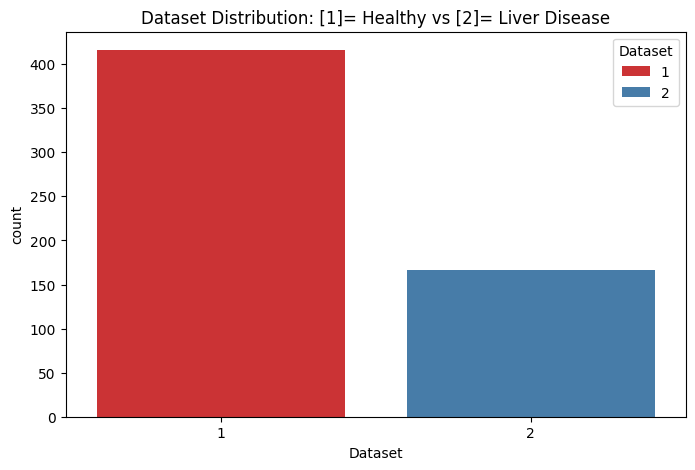

In [70]:
# Plot for gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x= 'Gender', data=liver_df, hue = 'Gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Plot for dataset distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Dataset', data=liver_df,  hue = 'Dataset', palette='Set1')
plt.title('Dataset Distribution: [1]= Healthy vs [2]= Liver Disease')
plt.show()

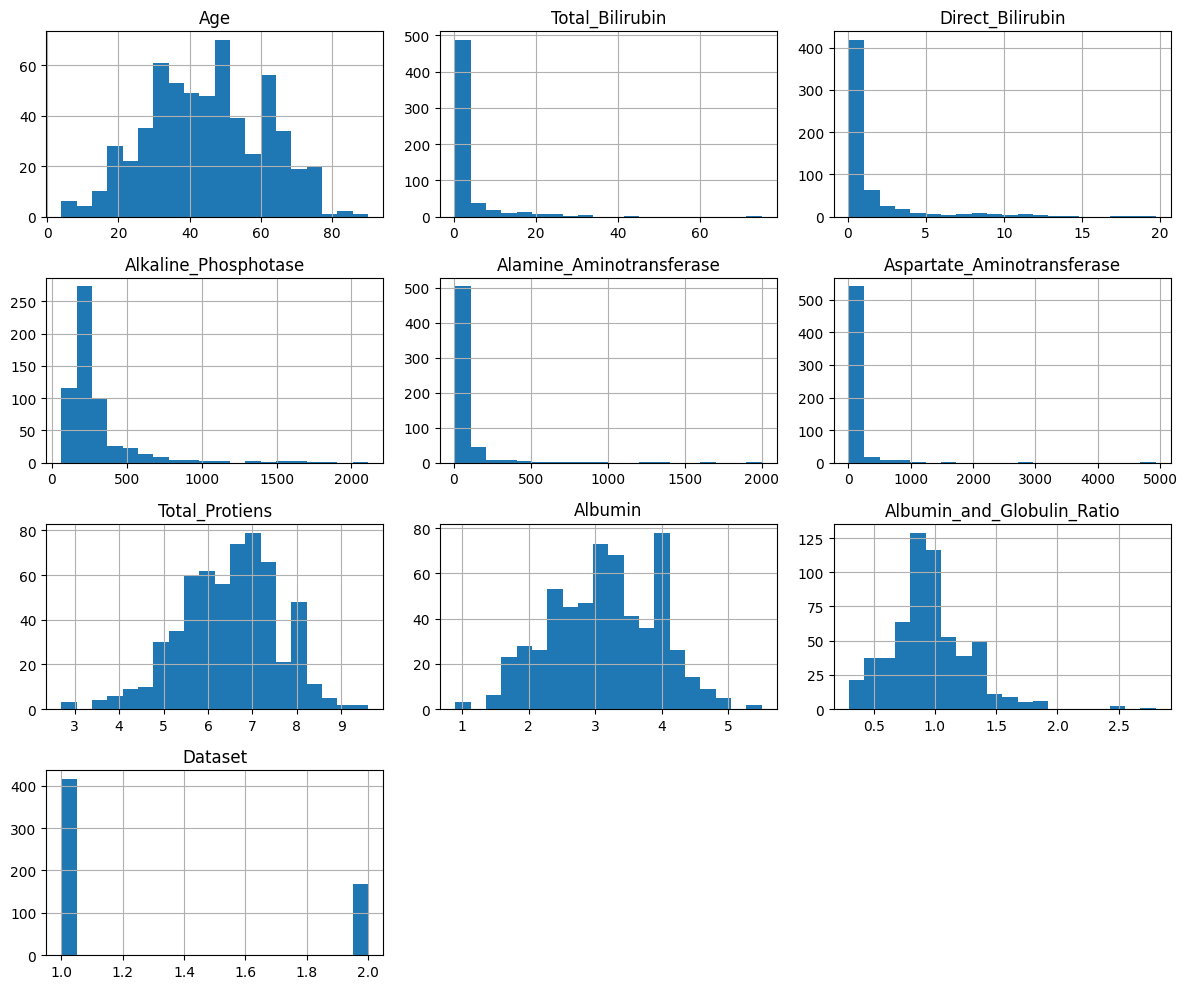

In [71]:
# Histogram for all numerical features
liver_df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

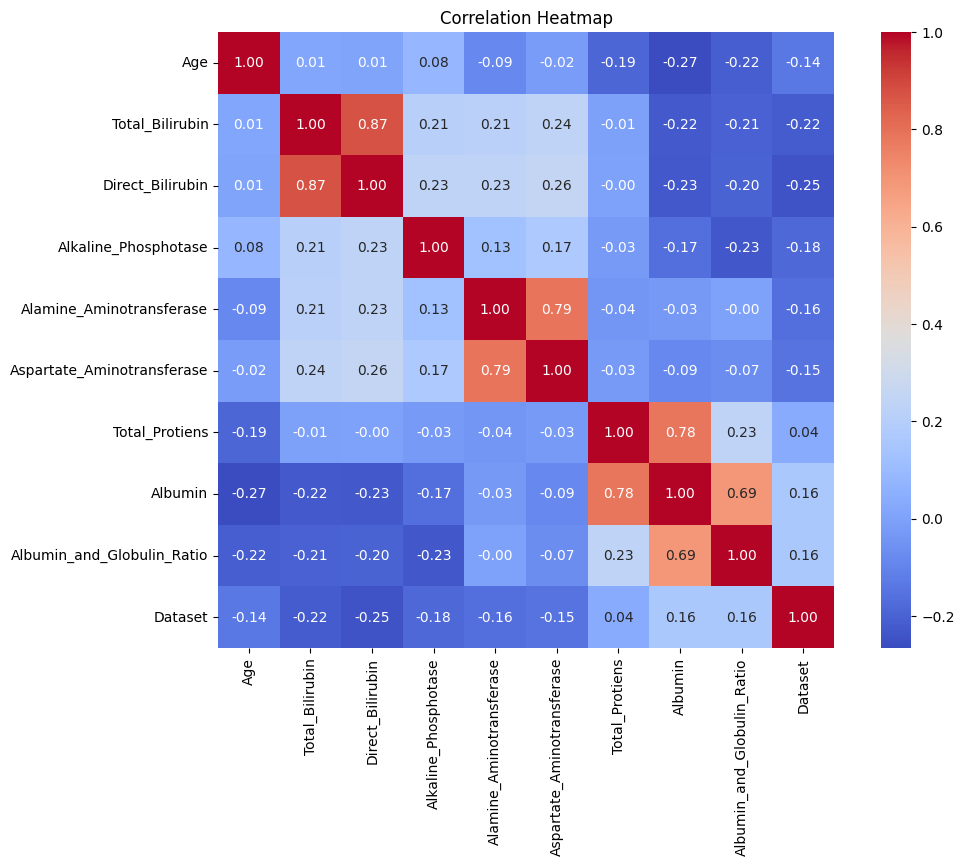

In [72]:
# Correlation Heatmap for numerical features
# Select the numerical features
numerical_col = liver_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
correlation_matrix = liver_df[numerical_col].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [73]:
# Fill missing values with its median
liver_df['Albumin_and_Globulin_Ratio'] = liver_df['Albumin_and_Globulin_Ratio'].fillna(
    liver_df['Albumin_and_Globulin_Ratio'].median()
)

In [74]:
# Check for missing values
print("Missing values in each column:")
print(liver_df.isnull().sum())

Missing values in each column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [75]:
liver_df['Gender'] = liver_df['Gender'].map({'Female': 0, 'Male': 1})

In [76]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [ ]:
# Save the cleaned dataset
# liver_df.to_csv('cleaned_liver_patient.csv', index=False)

In [77]:
# Feature Target Split
x = liver_df.drop(columns=['Dataset'])
y = liver_df['Dataset']

In [78]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [79]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (466, 10)
Shape of x_test: (117, 10)
Shape of y_train: (466,)
Shape of y_test: (117,)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7606837606837606
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.92      0.85        87
           2       0.56      0.30      0.39        30

    accuracy                           0.76       117
   macro avg       0.68      0.61      0.62       117
weighted avg       0.73      0.76      0.73       117

Random Forest Accuracy: 0.7350427350427351
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.86      0.83        87
           2       0.48      0.37      0.42        30

    accuracy                           0.74       117
   macro avg       0.64      0.61      0.62       117
weighted avg       0.72      0.74      0.72       117



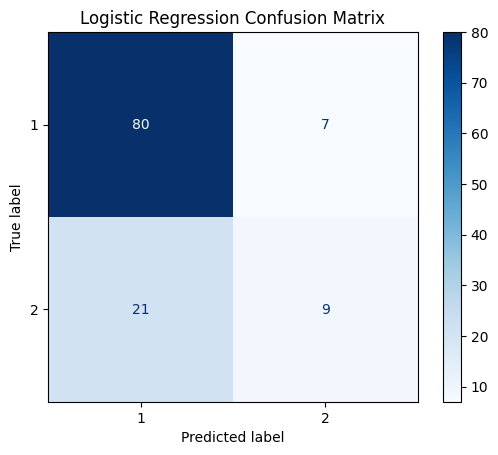

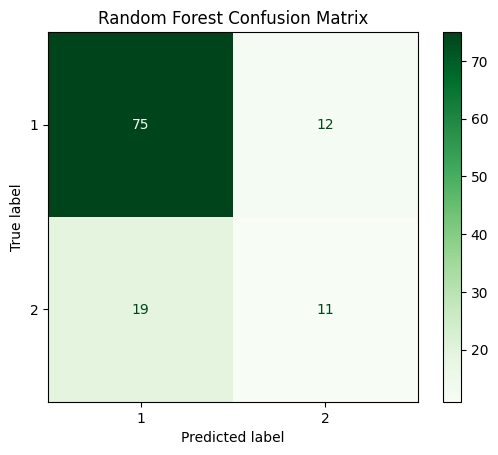

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test, cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()


Before SMOTE: Dataset
1    329
2    137
Name: count, dtype: int64
After SMOTE: Dataset
1    329
2    329
Name: count, dtype: int64

Logistic Regression with SMOTE
Accuracy: 0.6410256410256411
              precision    recall  f1-score   support

           1       0.96      0.54      0.69        87
           2       0.41      0.93      0.57        30

    accuracy                           0.64       117
   macro avg       0.69      0.74      0.63       117
weighted avg       0.82      0.64      0.66       117

Confusion Matrix:
 [[47 40]
 [ 2 28]]

Random Forest with SMOTE
Accuracy: 0.717948717948718
              precision    recall  f1-score   support

           1       0.85      0.76      0.80        87
           2       0.46      0.60      0.52        30

    accuracy                           0.72       117
   macro avg       0.65      0.68      0.66       117
weighted avg       0.75      0.72      0.73       117

Confusion Matrix:
 [[66 21]
 [12 18]]


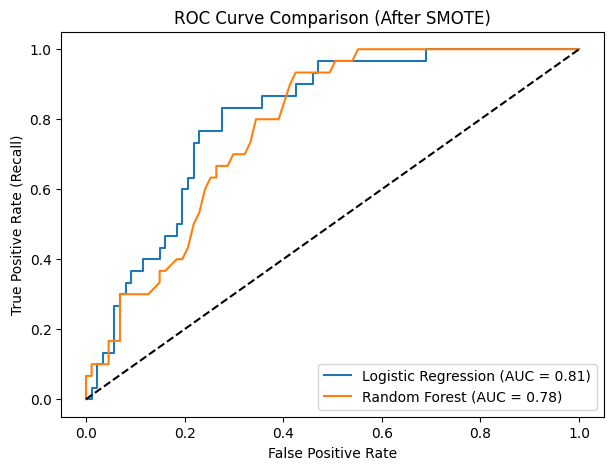

In [82]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt

# Apply SMOTE only on training set
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

# Logistic Regression with SMOTE
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train_res, y_train_res)
y_pred_lr = lr.predict(x_test)
y_prob_lr = lr.predict_proba(x_test)[:,1]   # probabilities for ROC

print("\nLogistic Regression with SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Random Forest with SMOTE
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_res, y_train_res)
y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:,1]   # probabilities for ROC

print("\nRandom Forest with SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# --- ROC Curve Comparison ---
fpr1, tpr1, _ = roc_curve(y_test, y_prob_lr, pos_label=2)
fpr2, tpr2, _ = roc_curve(y_test, y_prob_rf, pos_label=2)

plt.figure(figsize=(7,5))
plt.plot(fpr1, tpr1, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_lr)))
plt.plot(fpr2, tpr2, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison (After SMOTE)")
plt.legend()
plt.show()


In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Remap target labels globally (1 -> 0, 2 -> 1) ---
y_train_mapped = y_train.replace({1:0, 2:1})
y_test_mapped  = y_test.replace({1:0, 2:1})

# Apply SMOTE with remapped labels
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train_mapped)

print("Before SMOTE:", y_train_mapped.value_counts())
print("After SMOTE:", y_train_res.value_counts())

# --- XGBoost Model ---
xgb = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False,
    
)

xgb.fit(x_train_res, y_train_res)

# Predictions
y_pred_xgb = xgb.predict(x_test)   # use scaled test set (consistent with train)

# --- Evaluation ---
print("\nXGBoost Results")
print("Accuracy:", accuracy_score(y_test_mapped, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test_mapped, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_mapped, y_pred_xgb))


Before SMOTE: Dataset
0    329
1    137
Name: count, dtype: int64
After SMOTE: Dataset
0    329
1    329
Name: count, dtype: int64

XGBoost Results
Accuracy: 0.7350427350427351
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        87
           1       0.48      0.53      0.51        30

    accuracy                           0.74       117
   macro avg       0.66      0.67      0.66       117
weighted avg       0.74      0.74      0.74       117

Confusion Matrix:
 [[70 17]
 [14 16]]


d:\Projects\Multi_proj\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:12:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


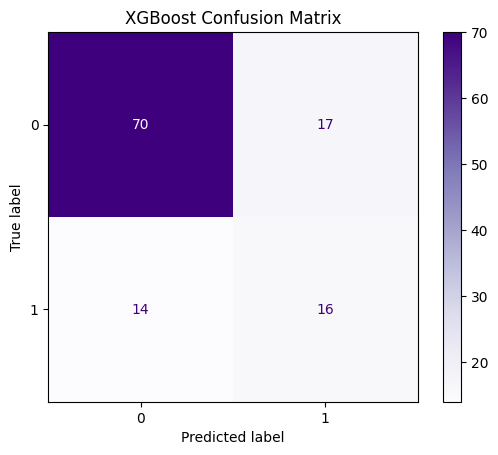

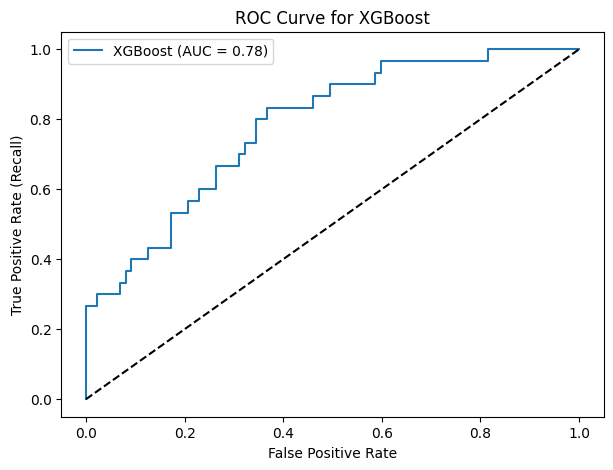

ROC AUC Score for XGBoost: 0.7827586206896552
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        87
           1       0.48      0.53      0.51        30

    accuracy                           0.74       117
   macro avg       0.66      0.67      0.66       117
weighted avg       0.74      0.74      0.74       117



In [84]:
# Plotting confusion matrix and roc curve for XGBoost

from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score
ConfusionMatrixDisplay.from_estimator(xgb, x_test, y_test_mapped, cmap="Purples")
plt.title("XGBoost Confusion Matrix")
plt.show()
fpr, tpr, _ = roc_curve(y_test_mapped, xgb.predict_proba(x_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="XGBoost (AUC = {:.2f})".format(roc_auc_score(y_test_mapped, xgb.predict_proba(x_test)[:,1])))
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for XGBoost")
plt.legend()
plt.show()

# Roc accuracy for XGBoost
roc_auc = roc_auc_score(y_test_mapped, xgb.predict_proba(x_test)[:,1])
print("ROC AUC Score for XGBoost:", roc_auc)

# classification report for XGBoost
print("Classification Report for XGBoost:\n", classification_report(y_test_mapped, y_pred_xgb))

In [85]:
# Save the best model
import joblib

best_xgb = xgb
joblib.dump(best_xgb, 'best_xgboost_model_liver.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler_liver.pkl')

# Save the feature columns
joblib.dump(list(x.columns), "liver_feature_columns.pkl")

['liver_feature_columns.pkl']

In [86]:
#load the model
loaded_model = joblib.load('best_xgboost_model_liver.pkl')

#load the scaler
loaded_scaler = joblib.load('scaler_liver.pkl')

# load the feature columns
loaded_feature_columns = joblib.load("liver_feature_columns.pkl")